In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.fft import fft, ifft, fftfreq, fftshift
%matplotlib widget

Util-функции

In [2]:
def draw_plots(rows, cols, width, height, subplot_data):
    fig, axes = plt.subplots(rows, cols, figsize=(width, height))
    axes = axes.flatten() if rows * cols > 1 else [axes]

    flat_data = [item for row in subplot_data for item in row]

    for idx, data in enumerate(flat_data):
        if idx >= len(axes):
            raise ValueError(f"Too many subplots provided in 'subplot_data': expected at most {rows * cols}, got more.")
        if not data:
            continue

        ax = axes[idx]

        (
            x_arrays, y_arrays,
            labels,
            x_label, y_label,
            colors, linestyles,
            linewidth, markers,
            markersizes, title,
            markerevery
        ) = data + [None] * (12 - len(data))

        num_plots = len(y_arrays)

        for i in range(num_plots):
            x = x_arrays[i]
            y = y_arrays[i]

            label = labels[i] if labels and i < len(labels) else None
            color = colors[i] if colors and i < len(colors) else None
            linestyle = linestyles[i] if linestyles and i < len(linestyles) else '-'
            lw = linewidth[i] if linewidth and i < len(linewidth) else 2
            marker = markers[i] if markers and i < len(markers) else None
            markersize = markersizes[i] if markersizes and i < len(markersizes) else None
            mevery = markerevery[i] if markerevery and i < len(markerevery) else None

            ax.plot(x, y,
                    label=label,
                    color=color,
                    linestyle=linestyle,
                    linewidth=lw,
                    marker=marker,
                    markersize=markersize,
                    markevery=mevery)

        if labels:
            ax.legend()
        ax.grid(True)
        if x_label:
            ax.set_xlabel(x_label)
        if y_label:
            ax.set_ylabel(y_label)
        if title:
            ax.set_title(title)
    
    for idx in range(len(flat_data), len(axes)):
        fig.delaxes(axes[idx])
        
    plt.gca().set_axisbelow(True) 
    plt.tight_layout()
    plt.show()

In [3]:
g = lambda t: 17 if (1 <= t <= 8) else 0
u = lambda t, b, c, d: g(t) + b * np.random.uniform(-1, 1) + c * np.sin(d * t)

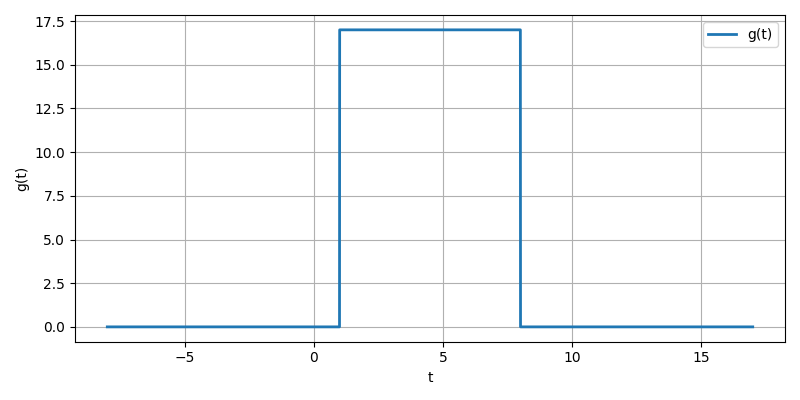

In [4]:
t_space_1 = np.linspace(-8, 17, 4048)
g_1 = [g(t) for t in t_space_1]

draw_plots(1, 1, 8, 4, [[[
    [t_space_1],
    [g_1],
    ['g(t)'],
    't', 'g(t)'
]]])

# Задание 1.1

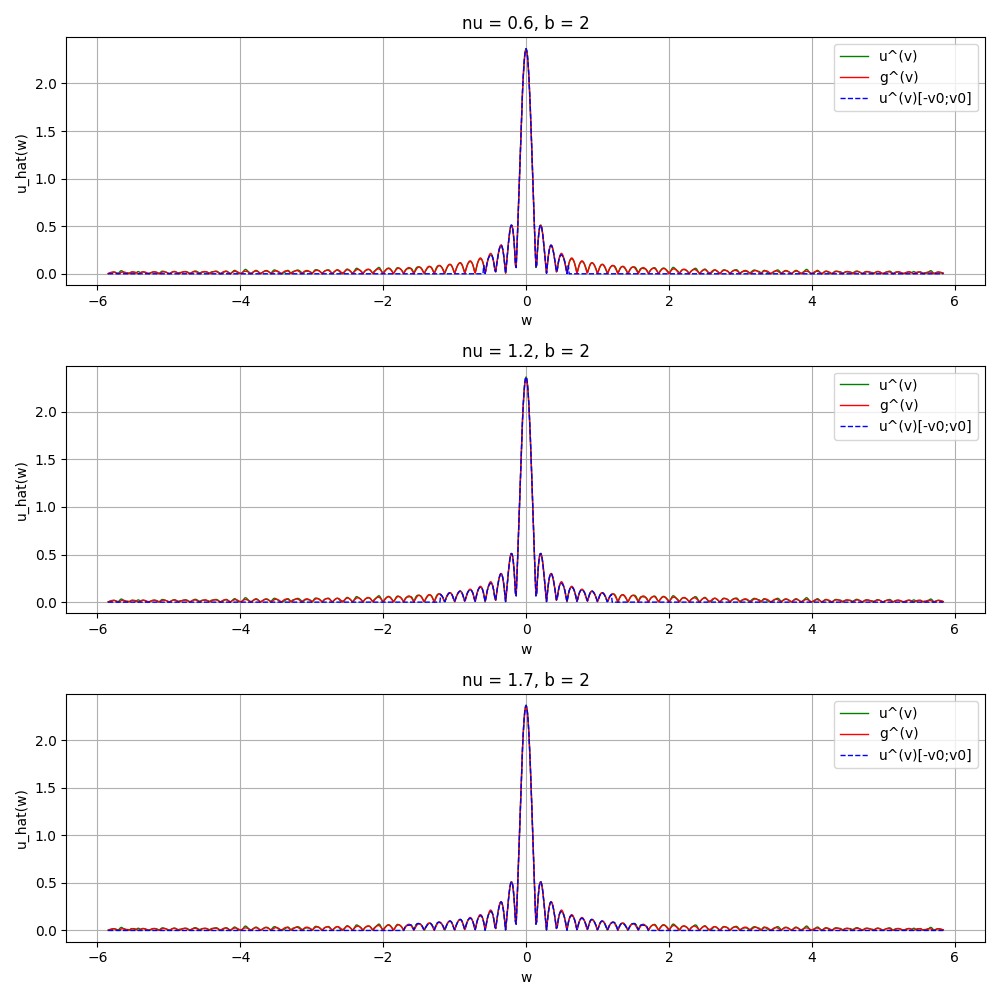

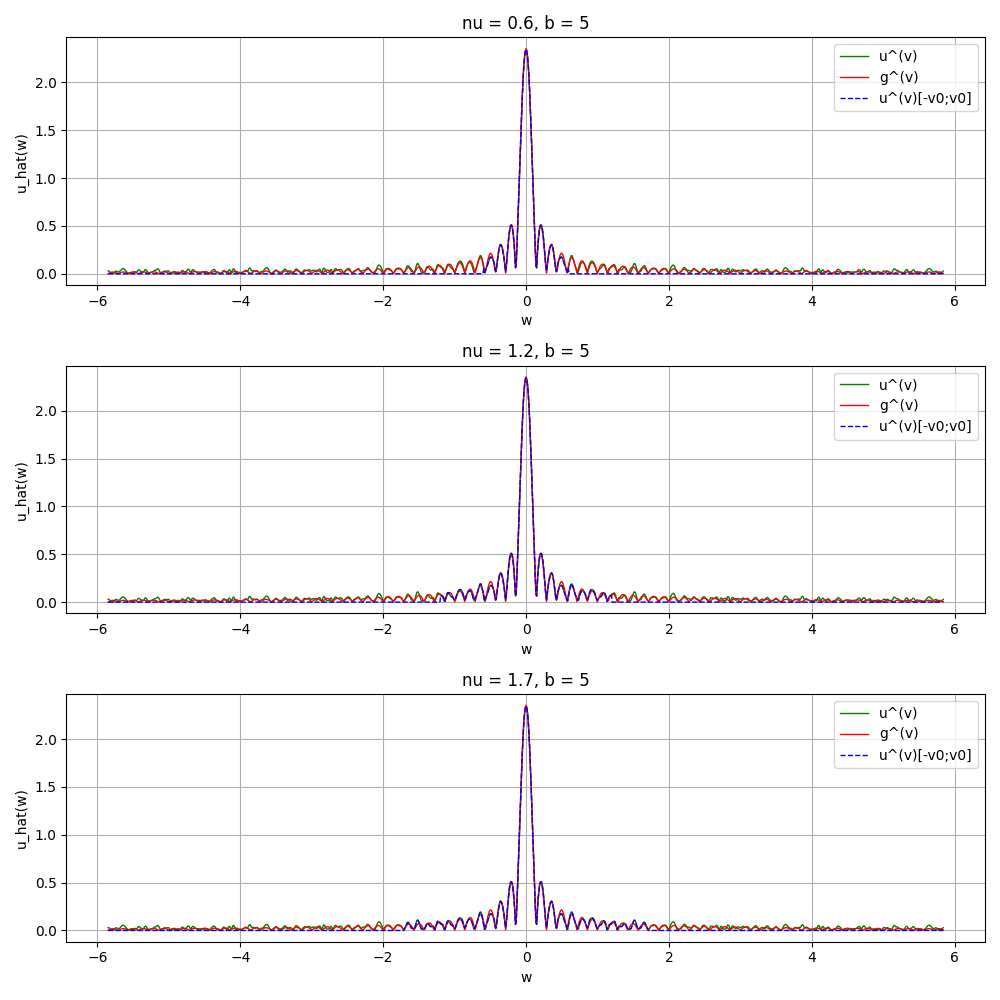

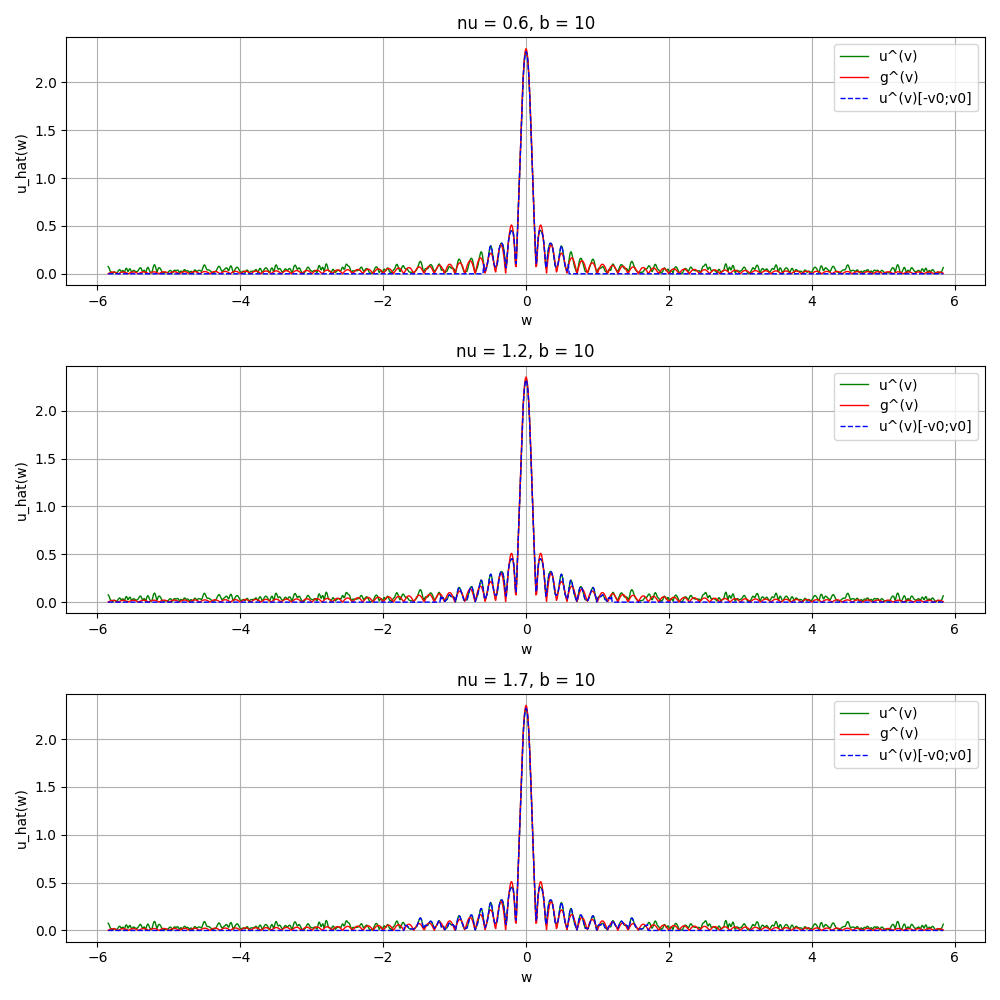

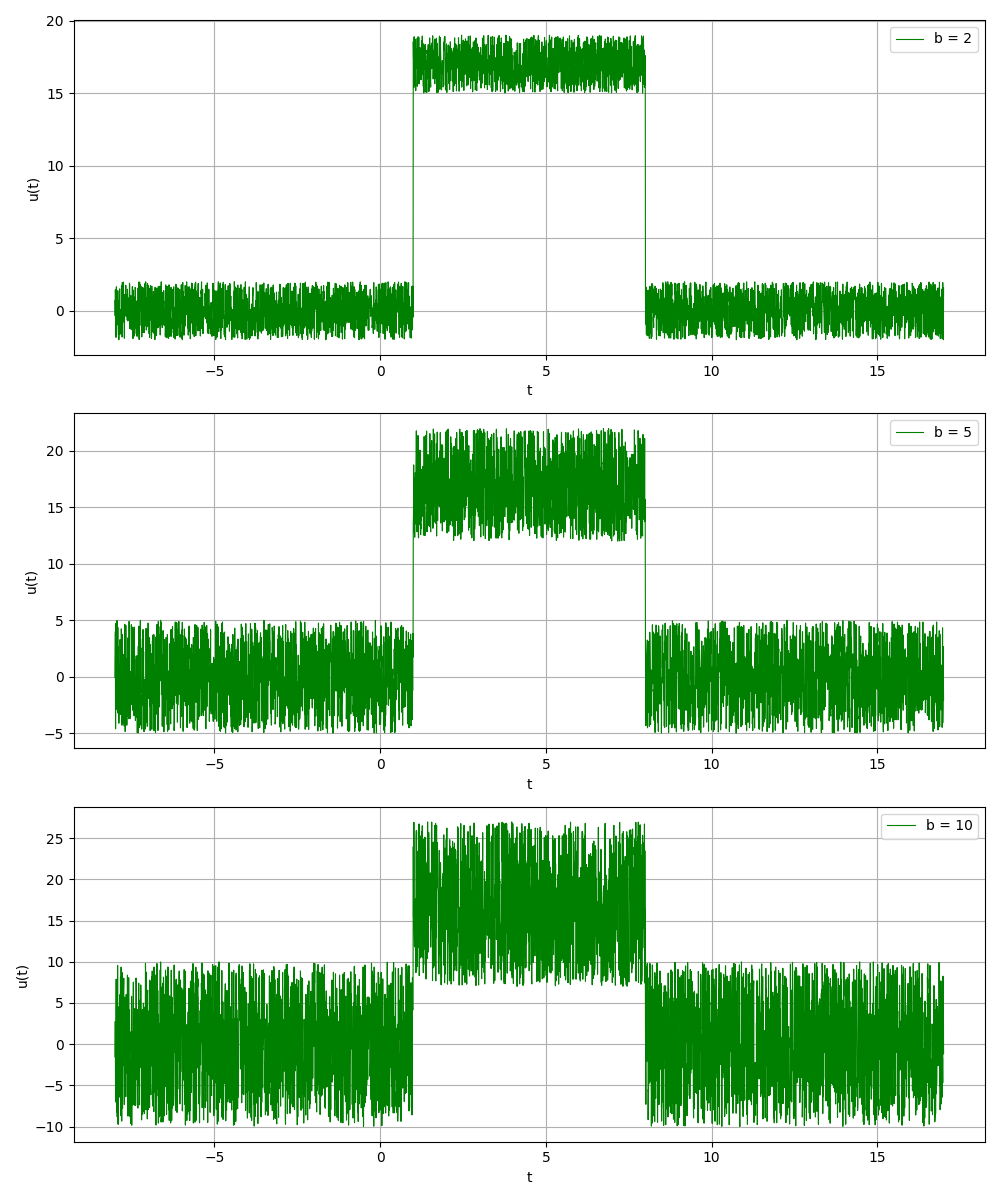

In [5]:
c = 0
d = 1 # любое число, чтобы можно было вызвать функцию, не влияет на результат
b_array = (2, 5, 10)
nu_array = (0.6, 1.2, 1.7)

subplot_data = []

dt = t_space_1[1] - t_space_1[0]

N = 2 ** 14 
g_hat = fftshift(fft(g_1, n=N))
freqs = fftshift(fftfreq(N, d=dt))

for b in b_array:
    subplot_data_Fourier_nu = []
    ub = [u(t, b, c, d) for t in t_space_1]
    
    subplot_data.append([[
        [t_space_1],
        [ub],
        [f"b = {b}"],
        "t",
        "u(t)",
        ["green"],
        [None],
        [0.8]
    ]])

    ub_hat = fftshift(fft(ub, n=N))
    to_cat = 7600
    for nu in nu_array:
        ub_catted = np.where((freqs >= -nu) & (freqs <= nu), ub_hat, 0)
        subplot_data_Fourier_nu.append([[
            [freqs[to_cat:-to_cat]] * 3,
            [2.0 / N * abs(ub_hat)[to_cat:-to_cat],
            2.0 / N * np.abs(g_hat)[to_cat:-to_cat],
            2.0 / N * np.abs(ub_catted)[to_cat:-to_cat]],
            ["u^(v)", "g^(v)", "u^(v)[-v0;v0]"],
            "w",
            "u_hat(w)",
            ["green", "red", "blue"] * 3,
            ["-", "-", "--"],
            [1] * 3,
            [None] * 3,
            [None] * 3,
            f"nu = {nu}, b = {b}"
        ]])
    draw_plots(
        rows=3,
        cols=1,
        width=10,
        height=10,
        subplot_data=subplot_data_Fourier_nu
    )


draw_plots(
    rows=3,
    cols=1,
    width=10,
    height=12,
    subplot_data=subplot_data
)